In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
the_path = '/content/gdrive/My Drive/master_thesis/predictions/'
! ls gdrive/My\ Drive/master_thesis/predictions

connect_0_DeNum_10_predictions.csv    mlp_0_DeNum_10_predictions.csv
connect_0_DeNum_15_predictions.csv    mlp_0_DeNum_15_predictions.csv
connect_0_DeNum_5_predictions.csv     mlp_0_DeNum_5_predictions.csv
connect_1_DeNum_10_predictions.csv    mlp_1_DeNum_10_predictions.csv
connect_1_DeNum_15_predictions.csv    mlp_1_DeNum_15_predictions.csv
connect_1_DeNum_5_predictions.csv     mlp_1_DeNum_5_predictions.csv
connect_2_DeNum_10_predictions.csv    mlp_2_DeNum_10_predictions.csv
connect_2_DeNum_15_predictions.csv    mlp_2_DeNum_15_predictions.csv
connect_2_DeNum_5_predictions.csv     mlp_2_DeNum_5_predictions.csv
connect_3_DeNum_10_predictions.csv    mlp_3_DeNum_10_predictions.csv
connect_3_DeNum_15_predictions.csv    mlp_3_DeNum_15_predictions.csv
connect_3_DeNum_5_predictions.csv     mlp_3_DeNum_5_predictions.csv
connect_4_DeNum_10_predictions.csv    mlp_4_DeNum_10_predictions.csv
connect_4_DeNum_15_predictions.csv    mlp_4_DeNum_15_predictions.csv
connect_4_DeNum_5_predictions.csv     

In [0]:
import numpy as np
import pandas as pd
import re
import random
import json
import collections
import pickle
import os
import importlib
import matplotlib

In [0]:
with open("/content/gdrive/My Drive/master_thesis/extended_relation_descriptions.json", 'r') as file:
    relation_descriptions = json.load(file)

In [0]:
def readin_result(model):
  result5 = pd.Series([])
  result10 = pd.Series([])
  result15 = pd.Series([])
  
  for i in range(5):
    the5 = pd.read_csv(the_path + str(model) + '_' + str(i) + '_DeNum_5_predictions.csv', usecols = [1,2,3])
    the10 = pd.read_csv(the_path + str(model) + '_' + str(i) + '_DeNum_10_predictions.csv', usecols = [1,2,3])
    the15 = pd.read_csv(the_path + str(model) + '_' + str(i) + '_DeNum_15_predictions.csv', usecols = [1,2,3])
        
    if result5.empty:
      result5 = the5
    else:
      result5 = pd.concat([result5, the5], ignore_index=True)
      
    if result10.empty:
      result10 = the10
    else:
      result10 = pd.concat([result10, the10], ignore_index=True)
      
    if result15.empty:
      result15 = the15
    else:
      result15 = pd.concat([result15, the15], ignore_index=True)
  
  return result5, result10, result15

In [0]:
connect_5, connect_10, connect_15 = readin_result('connect') 
inference_5, inference_10, inference_15 = readin_result('inference')
pooling_5, pooling_10, pooling_15 = readin_result('pooling')
mlp_5, mlp_10, mlp_15 = readin_result('mlp')

# Accuracy Rate of Each relation

In [0]:
def correctness(df):
  correct_dict = {}
  wrong_dict = {}
  
  for index, row in df.iterrows():
    
    true_label = row['true_label']
    predict_label = row['predict_label']
    relation = row['relation']
    
    if true_label == predict_label:
      if relation in correct_dict:
        correct_dict[relation] += 1
      else:
        correct_dict[relation] = 1
    else:
      if relation in wrong_dict:
        wrong_dict[relation] += 1
      else:
        wrong_dict[relation] = 1
        
  correctness_dict = {}
  for k in relation_descriptions:
    if k not in correct_dict:
      correct_dict[k] = 0
    if k not in wrong_dict:
      wrong_dict[k] = 0
      
    cor = correct_dict[k] / (correct_dict[k] + wrong_dict[k])
    
    correctness_dict[k] = cor
    
  return correctness_dict

In [0]:
# connect
correct_connect_5 = correctness(connect_5)
correct_connect_5_list = sorted([correct_connect_5[r] for r in correct_connect_5])

correct_connect_10 = correctness(connect_10)
correct_connect_10_list = sorted([correct_connect_10[r] for r in correct_connect_10])

correct_connect_15 = correctness(connect_15)
correct_connect_15_list = sorted([correct_connect_15[r] for r in correct_connect_15])

# inference
correct_inference_5 = correctness(inference_5)
correct_inference_5_list = sorted([correct_inference_5[r] for r in correct_inference_5])

correct_inference_10 = correctness(inference_10)
correct_inference_10_list = sorted([correct_inference_10[r] for r in correct_inference_10])

correct_inference_15 = correctness(inference_15)
correct_inference_15_list = sorted([correct_inference_15[r] for r in correct_inference_15])

# mlp
correct_mlp_5 = correctness(mlp_5)
correct_mlp_5_list = sorted([correct_mlp_5[r] for r in correct_mlp_5])

correct_mlp_10 = correctness(mlp_10)
correct_mlp_10_list = sorted([correct_mlp_10[r] for r in correct_mlp_10])

correct_mlp_15 = correctness(mlp_15)
correct_mlp_15_list = sorted([correct_mlp_15[r] for r in correct_mlp_15])


# pooling
correct_pooling_5 = correctness(pooling_5)
correct_pooling_5_list = sorted([correct_pooling_5[r] for r in correct_pooling_5])

correct_pooling_10 = correctness(pooling_10)
correct_pooling_10_list = sorted([correct_pooling_10[r] for r in correct_pooling_10])

correct_pooling_15 = correctness(pooling_15)
correct_pooling_15_list = sorted([correct_pooling_15[r] for r in correct_pooling_15])

In [9]:
correct_connect_5

{'IUCN conservation status': 0.4,
 'airline hub': 0.8133874239350912,
 'architect': 0.9016064257028112,
 'architectural style': 0.64,
 'author': 0.7667342799188641,
 'award received': 0.7709611451942741,
 'based on': 0.6733466933867736,
 'brother': 0.6388308977035491,
 'canonization status': 0.77,
 'cast member': 0.6253101736972705,
 'cause of death': 0.7665995975855131,
 'chairperson': 0.7681451612903226,
 'characters': 0.7327935222672065,
 'child': 0.559322033898305,
 'chromosome': 0.608,
 'collection': 0.5963855421686747,
 'conferred by': 0.7151639344262295,
 'conflict': 0.811088295687885,
 'connecting line': 0.5943204868154158,
 'constellation': 0.582,
 'continent': 0.854,
 'convicted of': 0.742,
 'country': 0.785140562248996,
 'country of citizenship': 0.744,
 'country of origin': 0.568,
 'creator': 0.8582995951417004,
 'crosses': 0.782,
 'date of birth': 0.56312625250501,
 'date of death': 0.598,
 'date of official opening': 0.678,
 'designer': 0.7550200803212851,
 'developer': 0

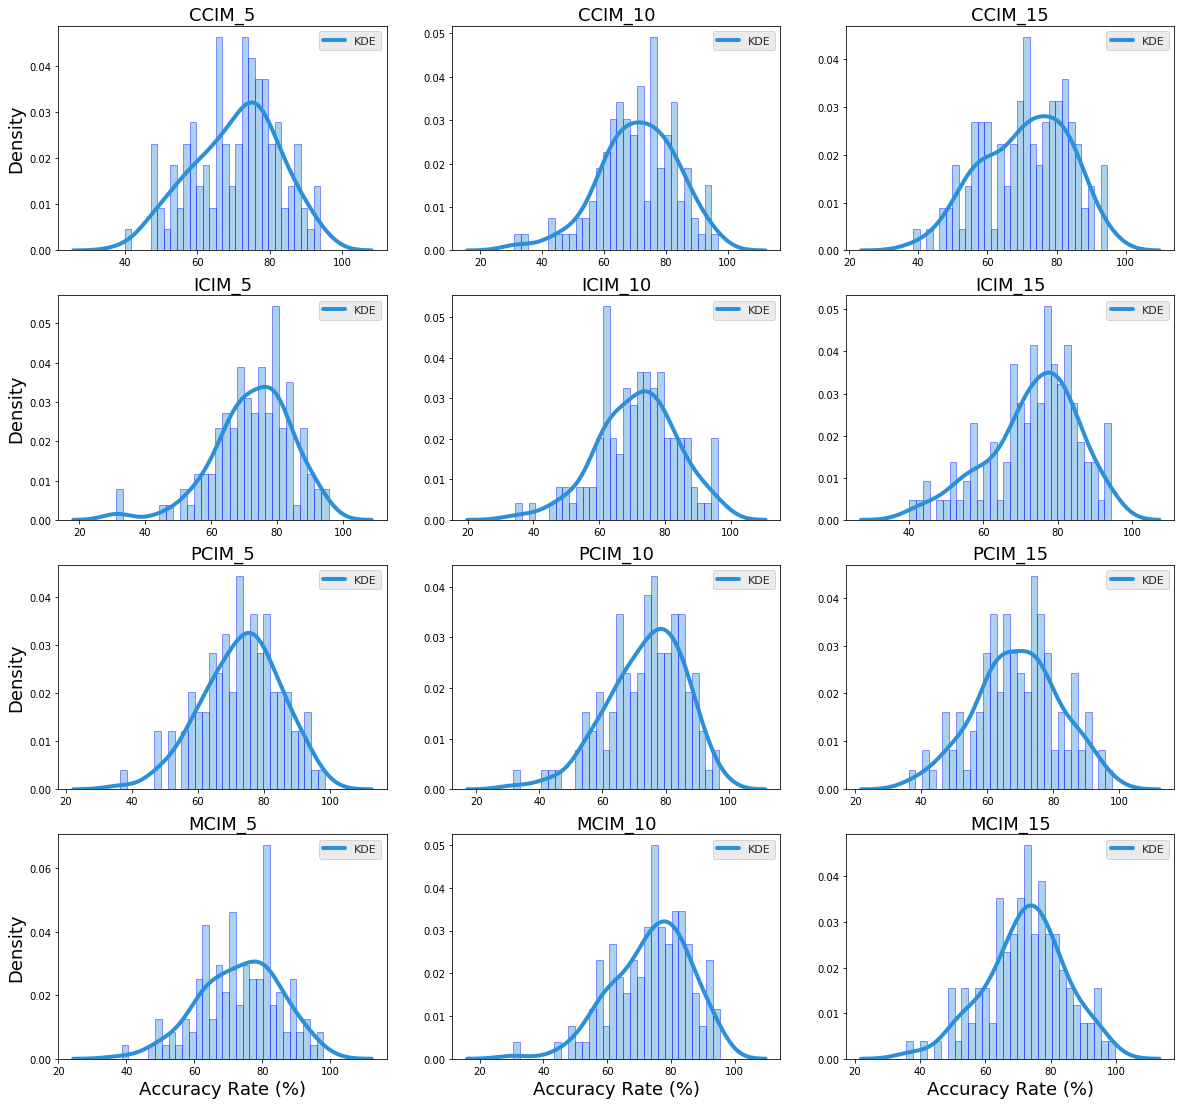

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(4, 3, figsize=(20,19))
sns.set()

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
axs[0, 0].set_title('CCIM_5', fontsize=18)
# axs[0, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
axs[0, 0].set_ylabel('Density', fontsize=18)

axs[1, 0].set_title('ICIM_5', fontsize=18)
# axs[1, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
axs[1, 0].set_ylabel('Density', fontsize=18)

axs[2, 0].set_title('PCIM_5', fontsize=18)
# axs[2, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
axs[2, 0].set_ylabel('Density', fontsize=18)

axs[3, 0].set_title('MCIM_5', fontsize=18)
axs[3, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
axs[3, 0].set_ylabel('Density', fontsize=18)

axs[0, 1].set_title('CCIM_10', fontsize=18)
# axs[0, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
# axs[0, 1].set_ylabel('Frequency', fontsize=18)

axs[1, 1].set_title('ICIM_10', fontsize=18)
# axs[1, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
# axs[1, 1].set_ylabel('Frequency', fontsize=18)

axs[2, 1].set_title('PCIM_10', fontsize=18)
# axs[2, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
# axs[2, 1].set_ylabel('Frequency', fontsize=18)

axs[3, 1].set_title('MCIM_10', fontsize=18)
axs[3, 1].set_xlabel('Accuracy Rate (%)', fontsize=18)
# axs[3, 1].set_ylabel('Frequency', fontsize=18)

axs[0, 2].set_title('CCIM_15', fontsize=18)
# axs[0, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
# axs[0, 1].set_ylabel('Frequency', fontsize=18)

axs[1, 2].set_title('ICIM_15', fontsize=18)
# axs[1, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
# axs[1, 1].set_ylabel('Frequency', fontsize=18)

axs[2, 2].set_title('PCIM_15', fontsize=18)
# axs[2, 0].set_xlabel('Accuracy Rate (%)', fontsize=18)
# axs[2, 1].set_ylabel('Frequency', fontsize=18)

axs[3, 2].set_title('MCIM_15', fontsize=18)
axs[3, 2].set_xlabel('Accuracy Rate (%)', fontsize=18)
# axs[3, 1].set_ylabel('Frequency', fontsize=18)

sns.distplot([c * 100 for c in correct_connect_5_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[0, 0])
sns.distplot([c * 100 for c in correct_inference_5_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[1, 0])
sns.distplot([c * 100 for c in correct_pooling_5_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[2, 0])
sns.distplot([c * 100 for c in correct_mlp_5_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[3, 0])


sns.distplot([c * 100 for c in correct_connect_10_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[0, 1])
sns.distplot([c * 100 for c in correct_inference_10_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[1, 1])
sns.distplot([c * 100 for c in correct_pooling_10_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[2, 1])
sns.distplot([c * 100 for c in correct_mlp_10_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[3, 1])


sns.distplot([c * 100 for c in correct_connect_15_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[0, 2])
sns.distplot([c * 100 for c in correct_inference_15_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[1, 2])
sns.distplot([c * 100 for c in correct_pooling_15_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[2, 2])
sns.distplot([c * 100 for c in correct_mlp_15_list], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=axs[3, 2])

matplotlib.rc('ytick', labelsize=15)
matplotlib.rc('xtick', labelsize=15)

# ANOVA

In [0]:
correct_connect_5_df = pd.DataFrame({'Model': ['CCIM'] * len(correct_connect_5_list), 'Description Number': [5] * len(correct_connect_5_list), 'Accuracy' : [correct_connect_5[r] for r in correct_connect_5], 'Relation': list(correct_connect_5.keys())})
correct_connect_10_df = pd.DataFrame({'Model': ['CCIM'] * len(correct_connect_10_list), 'Description Number': [10] * len(correct_connect_10_list), 'Accuracy' : [correct_connect_10[r] for r in correct_connect_10], 'Relation': list(correct_connect_10.keys())})
correct_connect_15_df = pd.DataFrame({'Model': ['CCIM'] * len(correct_connect_15_list), 'Description Number': [15] * len(correct_connect_15_list), 'Accuracy' : [correct_connect_15[r] for r in correct_connect_15], 'Relation': list(correct_connect_15.keys())})

correct_inference_5_df = pd.DataFrame({'Model': ['ICIM'] * len(correct_inference_5_list), 'Description Number': [5] * len(correct_inference_5_list), 'Accuracy' : [correct_inference_5[r] for r in correct_inference_5], 'Relation': list(correct_inference_5.keys())})
correct_inference_10_df = pd.DataFrame({'Model': ['ICIM'] * len(correct_inference_10_list), 'Description Number': [10] * len(correct_inference_10_list), 'Accuracy' : [correct_inference_10[r] for r in correct_inference_10], 'Relation': list(correct_inference_10.keys())})
correct_inference_15_df = pd.DataFrame({'Model': ['ICIM'] * len(correct_inference_15_list), 'Description Number': [15] * len(correct_inference_15_list), 'Accuracy' : [correct_inference_15[r] for r in correct_inference_15], 'Relation': list(correct_inference_15.keys())})

correct_pooling_5_df = pd.DataFrame({'Model': ['PCIM'] * len(correct_pooling_5_list), 'Description Number': [5] * len(correct_pooling_5_list), 'Accuracy' : [correct_pooling_5[r] for r in correct_pooling_5], 'Relation': list(correct_pooling_5.keys())})
correct_pooling_10_df = pd.DataFrame({'Model': ['PCIM'] * len(correct_pooling_10_list), 'Description Number': [10] * len(correct_pooling_10_list), 'Accuracy' : [correct_pooling_10[r] for r in correct_pooling_10], 'Relation': list(correct_pooling_10.keys())})
correct_pooling_15_df = pd.DataFrame({'Model': ['PCIM'] * len(correct_pooling_15_list), 'Description Number': [15] * len(correct_pooling_15_list), 'Accuracy' : [correct_pooling_15[r] for r in correct_pooling_15], 'Relation': list(correct_pooling_15.keys())})

correct_mlp_5_df = pd.DataFrame({'Model': ['MCIM'] * len(correct_mlp_5_list), 'Description Number': [5] * len(correct_mlp_5_list), 'Accuracy' : [correct_mlp_5[r] for r in correct_mlp_5], 'Relation': list(correct_mlp_5.keys())})
correct_mlp_10_df = pd.DataFrame({'Model': ['MCIM'] * len(correct_mlp_10_list), 'Description Number': [10] * len(correct_mlp_10_list), 'Accuracy' : [correct_mlp_10[r] for r in correct_mlp_10], 'Relation': list(correct_mlp_10.keys())})
correct_mlp_15_df = pd.DataFrame({'Model': ['MCIM'] * len(correct_mlp_15_list), 'Description Number': [15] * len(correct_mlp_15_list), 'Accuracy' : [correct_mlp_15[r] for r in correct_mlp_15], 'Relation': list(correct_mlp_15.keys())})




In [0]:
total_df = pd.concat([correct_connect_5_df, correct_connect_10_df, correct_connect_15_df, correct_inference_5_df, correct_inference_10_df, correct_inference_15_df, 
           correct_pooling_5_df, correct_pooling_10_df, correct_pooling_15_df, correct_mlp_5_df, correct_mlp_10_df, correct_mlp_15_df], ignore_index=True)

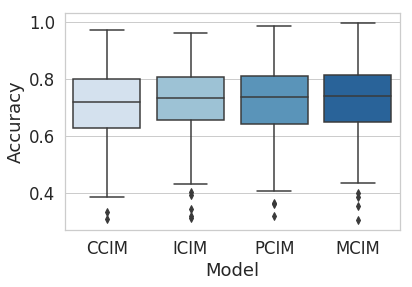

In [13]:
sns.set(style="whitegrid", font_scale=1.5)
ax = sns.boxplot(x="Model", y="Accuracy", data=total_df, palette="Blues")

In [14]:
total_df[total_df['Description Number'] == 5]

,Model,Description Number,Accuracy,Relation
0,CCIM,5,0.813387,airline hub
1,CCIM,5,0.901606,architect
2,CCIM,5,0.640000,architectural style
3,CCIM,5,0.766734,author
4,CCIM,5,0.770961,award received
5,CCIM,5,0.673347,based on
6,CCIM,5,0.638831,brother
7,CCIM,5,0.770000,canonization status
8,CCIM,5,0.625310,cast member
9,CCIM,5,0.766600,cause of death


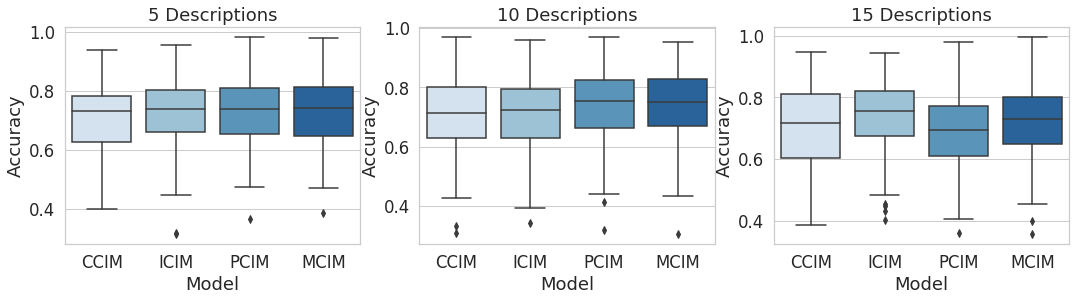

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(18,4))
axs[0].set_title('5 Descriptions', fontsize=18)
axs[1].set_title('10 Descriptions', fontsize=18)
axs[2].set_title('15 Descriptions', fontsize=18)
sns.boxplot(x="Model", y="Accuracy", data=total_df[total_df['Description Number'] == 5], palette="Blues", ax=axs[0])
sns.boxplot(x="Model", y="Accuracy", data=total_df[total_df['Description Number'] == 10], palette="Blues", ax=axs[1])
sns.boxplot(x="Model", y="Accuracy", data=total_df[total_df['Description Number'] == 15], palette="Blues", ax=axs[2])

In [16]:
import scipy.stats as stats

stats.f_oneway(total_df[total_df['Model'] == 'CCIM']['Accuracy'], total_df[total_df['Model'] == 'ICIM']['Accuracy'], total_df[total_df['Model'] == 'PCIM']['Accuracy'], total_df[total_df['Model'] == 'MCIM']['Accuracy'])

F_onewayResult(statistic=2.371860471126475, pvalue=0.06876317031413147)

In [17]:
stats.f_oneway(total_df[total_df['Model'] == 'CCIM'][total_df['Description Number'] == 5]['Accuracy'], total_df[total_df['Model'] == 'ICIM'][total_df['Description Number'] == 5]['Accuracy'], 
               total_df[total_df['Model'] == 'PCIM'][total_df['Description Number'] == 5]['Accuracy'], total_df[total_df['Model'] == 'MCIM'][total_df['Description Number'] == 5]['Accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


F_onewayResult(statistic=1.358950188722323, pvalue=0.2546622346723061)

In [18]:
stats.f_oneway(total_df[total_df['Model'] == 'CCIM'][total_df['Description Number'] == 10]['Accuracy'], total_df[total_df['Model'] == 'ICIM'][total_df['Description Number'] == 10]['Accuracy'], 
               total_df[total_df['Model'] == 'PCIM'][total_df['Description Number'] == 10]['Accuracy'], total_df[total_df['Model'] == 'MCIM'][total_df['Description Number'] == 10]['Accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


F_onewayResult(statistic=1.7846908817844034, pvalue=0.14918243478145848)

In [19]:
stats.f_oneway(total_df[total_df['Model'] == 'CCIM'][total_df['Description Number'] == 15]['Accuracy'], total_df[total_df['Model'] == 'ICIM'][total_df['Description Number'] == 15]['Accuracy'], 
               total_df[total_df['Model'] == 'PCIM'][total_df['Description Number'] == 15]['Accuracy'], total_df[total_df['Model'] == 'MCIM'][total_df['Description Number'] == 15]['Accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


F_onewayResult(statistic=2.516376105565208, pvalue=0.05761651351788494)

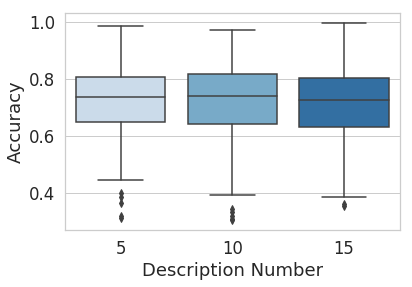

In [20]:
ax = sns.boxplot(x="Description Number", y="Accuracy", data=total_df, palette="Blues")

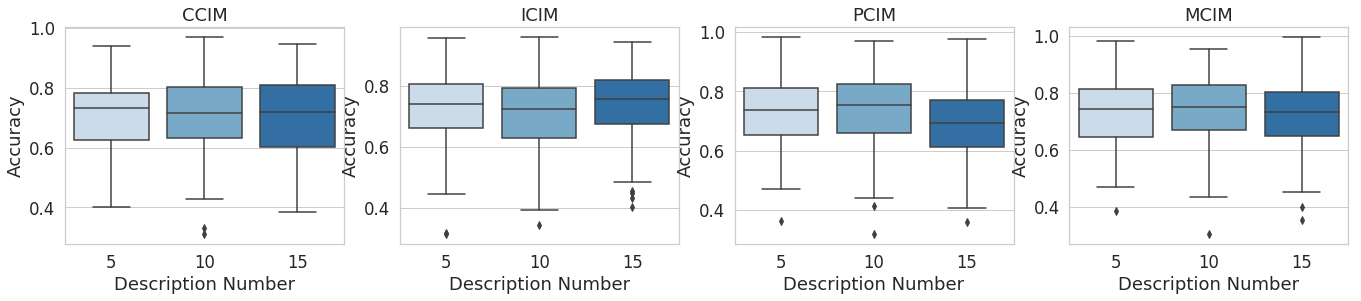

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(23,4))
axs[0].set_title('CCIM', fontsize=18)
axs[1].set_title('ICIM', fontsize=18)
axs[2].set_title('PCIM', fontsize=18)
axs[3].set_title('MCIM', fontsize=18)
sns.boxplot(x="Description Number", y="Accuracy", data=total_df[total_df['Model'] == 'CCIM'], palette="Blues", ax=axs[0])
sns.boxplot(x="Description Number", y="Accuracy", data=total_df[total_df['Model'] == 'ICIM'], palette="Blues", ax=axs[1])
sns.boxplot(x="Description Number", y="Accuracy", data=total_df[total_df['Model'] == 'PCIM'], palette="Blues", ax=axs[2])
sns.boxplot(x="Description Number", y="Accuracy", data=total_df[total_df['Model'] == 'MCIM'], palette="Blues", ax=axs[3])

In [22]:
import scipy.stats as stats

stats.f_oneway(total_df[total_df['Description Number'] == 5]['Accuracy'], total_df[total_df['Description Number'] == 10]['Accuracy'], total_df[total_df['Description Number'] == 15]['Accuracy'])

F_onewayResult(statistic=1.1941914250589496, pvalue=0.303249277607879)

In [23]:
stats.f_oneway(total_df[total_df['Description Number'] == 5][total_df['Model'] == 'CCIM']['Accuracy'], total_df[total_df['Description Number'] == 10][total_df['Model'] == 'CCIM']['Accuracy'], 
               total_df[total_df['Description Number'] == 15][total_df['Model'] == 'CCIM']['Accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


F_onewayResult(statistic=0.022244465333875228, pvalue=0.9780024738914816)

In [24]:
stats.f_oneway(total_df[total_df['Description Number'] == 5][total_df['Model'] == 'ICIM']['Accuracy'], total_df[total_df['Description Number'] == 10][total_df['Model'] == 'ICIM']['Accuracy'], 
               total_df[total_df['Description Number'] == 15][total_df['Model'] == 'ICIM']['Accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


F_onewayResult(statistic=0.7739356017286749, pvalue=0.4619666249266555)

In [25]:
stats.f_oneway(total_df[total_df['Description Number'] == 5][total_df['Model'] == 'PCIM']['Accuracy'], total_df[total_df['Description Number'] == 10][total_df['Model'] == 'PCIM']['Accuracy'], 
               total_df[total_df['Description Number'] == 15][total_df['Model'] == 'PCIM']['Accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


F_onewayResult(statistic=4.808894408215115, pvalue=0.008692822392518576)

In [26]:
stats.f_oneway(total_df[total_df['Description Number'] == 5][total_df['Model'] == 'MCIM']['Accuracy'], total_df[total_df['Description Number'] == 10][total_df['Model'] == 'MCIM']['Accuracy'], 
               total_df[total_df['Description Number'] == 15][total_df['Model'] == 'MCIM']['Accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


F_onewayResult(statistic=0.578690647012226, pvalue=0.5611569623741541)

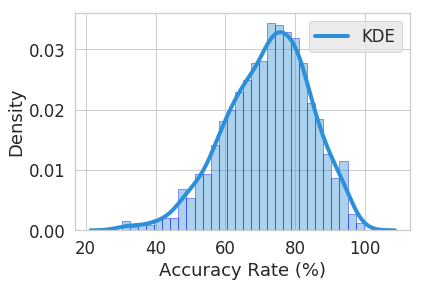

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 1)
# fig, ax = plt.subplots(1, 1, figsize=(20,19))
# sns.set()

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# ax.set_title('CCIM_5', fontsize=18)
ax.set_xlabel('Accuracy Rate (%)', fontsize=18)
ax.set_ylabel('Density', fontsize=18)


sns.distplot([c * 100 for c in total_df['Accuracy']], hist=True, kde=True, 
             bins=int(30), color = '#2b90d9',
             hist_kws={'edgecolor':'blue'}, kde_kws={'linewidth': 4, "label": "KDE"}, ax=ax)


# matplotlib.rc('ytick', labelsize=15)
# matplotlib.rc('xtick', labelsize=15)

In [0]:
dict_list = [correct_connect_5, correct_connect_10, correct_connect_15, correct_inference_5, correct_inference_10, correct_inference_15, correct_mlp_5, correct_mlp_10, correct_mlp_15, correct_pooling_5, correct_pooling_10, correct_pooling_15]

In [0]:
total_dict = {r : 0 for r in relation_descriptions}

In [0]:
for d in dict_list:
  for d_k in d:
    total_dict[d_k] += d[d_k]

In [0]:
total_dict_mean = {a : total_dict[a]/len(dict_list) for a in total_dict}

In [32]:
total_dict_mean.items()

dict_items([('airline hub', 0.79631507775524), ('architect', 0.8726572958500669), ('architectural style', 0.6905000000000001), ('author', 0.8488843813387423), ('award received', 0.7808452624403546), ('based on', 0.6564796259185037), ('brother', 0.644919972164231), ('canonization status', 0.7913333333333333), ('cast member', 0.6590157154673285), ('cause of death', 0.85261569416499), ('chairperson', 0.7405913978494624), ('characters', 0.7332995951417004), ('child', 0.551024011299435), ('chromosome', 0.638), ('collection', 0.6736947791164658), ('conferred by', 0.7370218579234972), ('conflict', 0.7734428473648188), ('connecting line', 0.7021636240703177), ('constellation', 0.7035), ('continent', 0.7888333333333334), ('convicted of', 0.7273333333333333), ('country', 0.7329317269076304), ('country of citizenship', 0.7521666666666667), ('country of origin', 0.6049999999999999), ('creator', 0.8733130904183536), ('crosses', 0.8119999999999999), ('date of birth', 0.5233800935203741), ('date of d

In [33]:
relation_order = []
for elem in sorted(total_dict_mean.items(),  key=lambda x: x[1]) :
  print(elem[0] , " ::" , elem[1] )
  relation_order.append(elem[0])

IUCN conservation status  :: 0.3578333333333333
found in taxon  :: 0.4504008016032064
license  :: 0.4793346774193548
publication date  :: 0.48200000000000004
place of burial  :: 0.5025000000000001
date of birth  :: 0.5233800935203741
educated at  :: 0.5378151260504201
child  :: 0.551024011299435
instrumentation  :: 0.5513745704467353
stock exchange  :: 0.5688844086021505
mouth of the watercourse  :: 0.5703333333333335
replaced by  :: 0.5846720214190093
manner of death  :: 0.5938333333333333
programming language  :: 0.5945121951219511
head of government  :: 0.5964912280701755
country of origin  :: 0.6049999999999999
narrative location  :: 0.60752688172043
medical condition  :: 0.6128333333333333
mother  :: 0.6154999999999999
record label  :: 0.6234939759036146
inception  :: 0.6313333333333334
product  :: 0.6349618849618849
father  :: 0.6366666666666668
parent taxon  :: 0.6376666666666667
chromosome  :: 0.638
home venue  :: 0.6393908969210175
material used  :: 0.6405263157894736
brother 

In [34]:
len(relation_order)

120

In [0]:
a = [total_df[total_df['Relation'] == a]['Accuracy'] for a in relation_descriptions]

In [36]:
stats.f_oneway(a[0], a[1], a[2])

F_onewayResult(statistic=47.97527210593949, pvalue=1.7119755145977558e-10)

In [37]:
stats.f_oneway(*a)

F_onewayResult(statistic=38.67446932833189, pvalue=0.0)

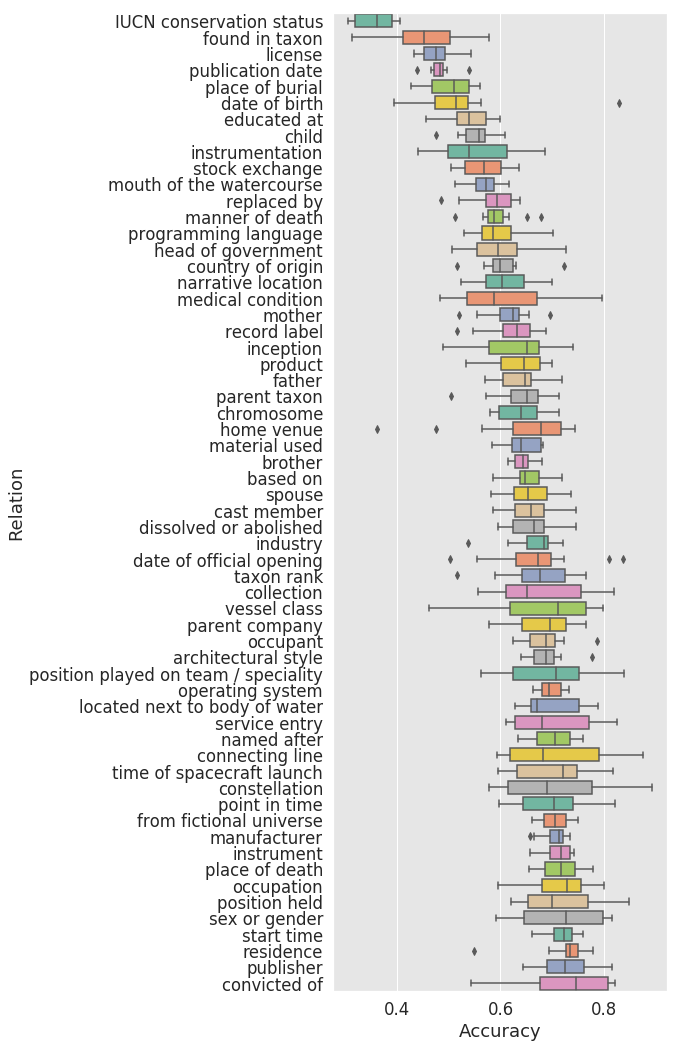

In [38]:
plt.figure(figsize=(6, 18))

ax = sns.boxplot(x="Accuracy", y="Relation", data=total_df, palette="Set2", order=relation_order[:60])

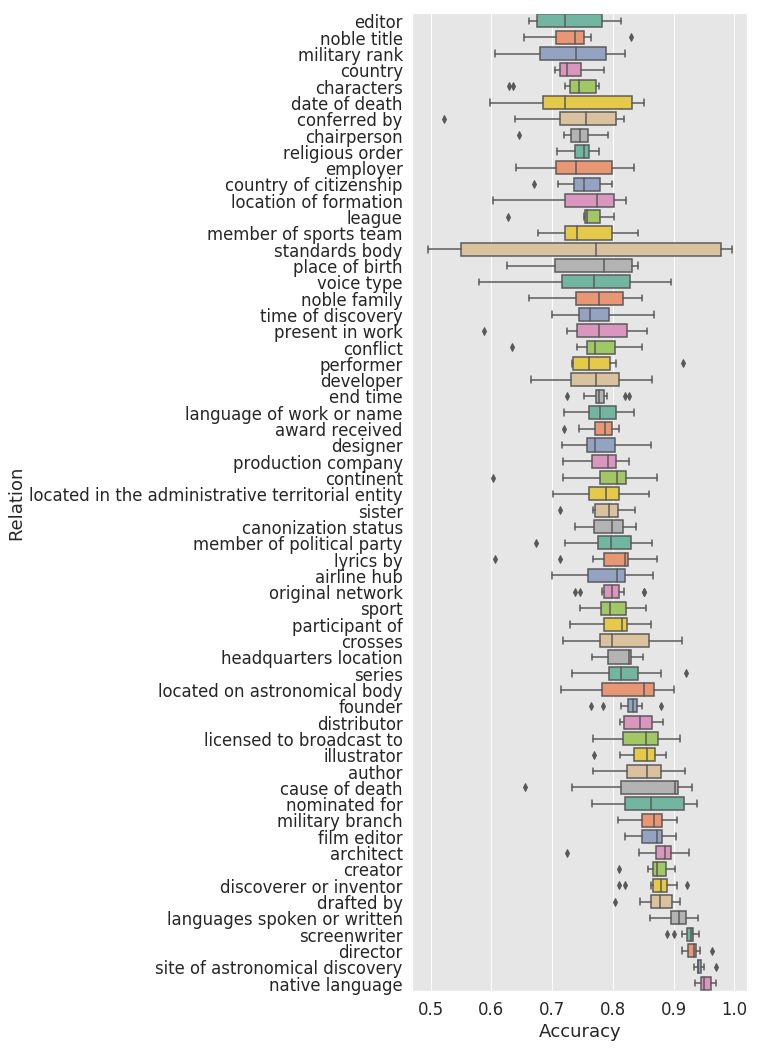

In [39]:
plt.figure(figsize=(6, 18))

ax = sns.boxplot(x="Accuracy", y="Relation", data=total_df, palette="Set2", order=relation_order[60:])

In [40]:
len(relation_descriptions['IUCN conservation status']), len(relation_descriptions['found in taxon']), \
len(relation_descriptions['license']), len(relation_descriptions['publication date']), len(relation_descriptions['place of burial'])

(50, 50, 22, 50, 50)

In [41]:
len(relation_descriptions['native language']), len(relation_descriptions['site of astronomical discovery']),\
len(relation_descriptions['director']), len(relation_descriptions['screenwriter']), len(relation_descriptions['languages spoken or written'])

(50, 50, 50, 50, 50)

In [42]:
relation_descriptions['publication date']

['The film SUBJECT_ENTITY was released in the year OBJECT_ENTITY\n',
 'SUBJECT_ENTITY was created in the year OBJECT_ENTITY\n',
 'SUBJECT_ENTITY was published in the year OBJECT_ENTITY\n',
 'SUBJECT_ENTITY was released in the year OBJECT_ENTITY\n',
 'The date of publication for SUBJECT_ENTITY was OBJECT_ENTITY\n',
 'The publication date of SUBJECT_ENTITY is OBJECT_ENTITY\n',
 'The publication year of SUBJECT_ENTITY was OBJECT_ENTITY\n',
 'The year that SUBJECT_ENTITY was made was OBJECT_ENTITY\n',
 'OBJECT_ENTITY is the publication date of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY is the publication year of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY is the year that SUBJECT_ENTITY was released\n',
 'OBJECT_ENTITY was the publication year of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY was the release year of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY was the year in which SUBJECT_ENTITY was made\n',
 'OBJECT_ENTITY was the year of publication for SUBJECT_ENTITY\n',
 'OBJECT_ENTITY was the year of SUBJECT_ENTITY\n',
 '

In [43]:
relation_descriptions['native language']

['The nationality of SUBJECT_ENTITY is OBJECT_ENTITY\n',
 'The nationality of SUBJECT_ENTITY was OBJECT_ENTITY\n',
 'The language of SUBJECT_ENTITY is OBJECT_ENTITY\n',
 'OBJECT_ENTITY is the national identity of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY is the native language of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY is the native tongue of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY nationality is SUBJECT_ENTITY\n',
 'The nationality of SUBJECT_ENTITY is OBJECT_ENTITY\n',
 'OBJECT_ENTITY was the nationality of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY was the native language of SUBJECT_ENTITY\n',
 'OBJECT_ENTITY is the ethnic group that SUBJECT_ENTITY belongs\n',
 'OBJECT_ENTITY was the nationality of SUBJECT_ENTITY\n',
 'The different nationalities of SUBJECT_ENTITY is OBJECT_ENTITY\n',
 'The minority nationalities of SUBJECT_ENTITY is OBJECT_ENTITY\n',
 'The various nationalities of SUBJECT_ENTITY is OBJECT_ENTITY\n',
 'The nationals of SUBJECT_ENTITY is OBJECT_ENTITY\n',
 'The different nationalities of SUB

In [45]:
relation_length = {r : [0, 0] for r in relation_descriptions}

for i in range(10):
  current_train = '/content/gdrive/My Drive/master_thesis/data/uwre/train.' + str(i)
  current_dev = '/content/gdrive/My Drive/master_thesis/data/uwre/dev.' + str(i)
  current_test = '/content/gdrive/My Drive/master_thesis/data/uwre/test.' + str(i)
  
  for path in [current_train, current_dev, current_test]:
    print(path)
    with open(path) as f:
        for line in f:
            loaded_example = json.loads(line)
            relation = loaded_example["relation"]
            sentence = loaded_example["sentence"]
            the_len = len(sentence.split())
            
            relation_length[relation][0] += 1
            relation_length[relation][1] += the_len

/content/gdrive/My Drive/master_thesis/data/uwre/train.0
/content/gdrive/My Drive/master_thesis/data/uwre/dev.0
/content/gdrive/My Drive/master_thesis/data/uwre/test.0
/content/gdrive/My Drive/master_thesis/data/uwre/train.1
/content/gdrive/My Drive/master_thesis/data/uwre/dev.1
/content/gdrive/My Drive/master_thesis/data/uwre/test.1
/content/gdrive/My Drive/master_thesis/data/uwre/train.2
/content/gdrive/My Drive/master_thesis/data/uwre/dev.2
/content/gdrive/My Drive/master_thesis/data/uwre/test.2
/content/gdrive/My Drive/master_thesis/data/uwre/train.3
/content/gdrive/My Drive/master_thesis/data/uwre/dev.3
/content/gdrive/My Drive/master_thesis/data/uwre/test.3
/content/gdrive/My Drive/master_thesis/data/uwre/train.4
/content/gdrive/My Drive/master_thesis/data/uwre/dev.4
/content/gdrive/My Drive/master_thesis/data/uwre/test.4
/content/gdrive/My Drive/master_thesis/data/uwre/train.5
/content/gdrive/My Drive/master_thesis/data/uwre/dev.5
/content/gdrive/My Drive/master_thesis/data/uwre

In [46]:
relation_length['native language']

[71015, 1294378]

In [0]:
relation_avelen = {r : (relation_length[r][1] / relation_length[r][0]) for r in relation_length}

In [48]:
relation_avelen

{'IUCN conservation status': 20.474713584288054,
 'airline hub': 23.103815705013908,
 'architect': 23.213343699201356,
 'architectural style': 23.316628477905073,
 'author': 21.510035975331203,
 'award received': 25.615852742299023,
 'based on': 23.868722529420104,
 'brother': 27.3418993843328,
 'canonization status': 25.242395061728395,
 'cast member': 21.689366958642154,
 'cause of death': 21.487385848498786,
 'chairperson': 32.40720174519081,
 'characters': 23.431594794336476,
 'child': 26.93864328701984,
 'chromosome': 20.29997185080929,
 'collection': 22.47705274247712,
 'conferred by': 25.281253153062256,
 'conflict': 24.27306697326818,
 'connecting line': 16.57918142760232,
 'constellation': 19.36543178550283,
 'continent': 28.18393545517446,
 'convicted of': 25.215721323011962,
 'country': 20.3109244881568,
 'country of citizenship': 21.566603174603173,
 'country of origin': 22.902435578661844,
 'creator': 23.200224271118863,
 'crosses': 23.224392232434035,
 'date of birth': 20

In [0]:
order_avelen = [relation_avelen[r] for r in relation_order]

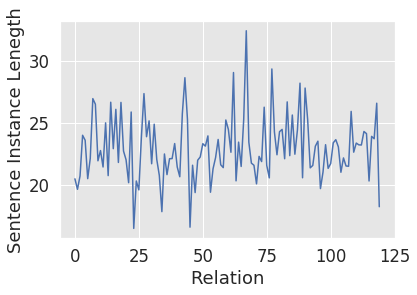

In [57]:
plt.plot(order_avelen)
plt.ylabel('Sentence Instance Lenegth')
plt.xlabel('Relation')
plt.show()